In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler , RobustScaler , OneHotEncoder

In [32]:
columns = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
    "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"
]

# age = Age (years), sex = Sex (1=male, 0=female), cp = Chest pain type,
# trestbps = Resting blood pressure (mm Hg), chol = Serum cholesterol (mg/dl),
# fbs = Fasting blood sugar >120 mg/dl (1=true, 0=false), restecg = Resting ECG results,
# thalach = Maximum heart rate achieved, exang = Exercise induced angina (1=yes, 0=no),
# oldpeak = ST depression induced by exercise, slope = Slope of peak exercise ST segment,
# ca = Number of major vessels (0–3) colored by fluoroscopy,
# thal = Thalassemia (3=normal, 6=fixed defect, 7=reversible defect),
# num = Diagnosis of heart disease (0=no disease, 1–4=disease)

df = pd.read_csv("E:\heart disease\Full Pipeline on Heart Disease UCI Dataset ML\data\processed_cleveland.csv",header=None, names=columns)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [33]:
df.replace("?",np.nan,inplace=True)
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

In [34]:
df["ca"] = df["ca"].fillna(df["ca"].mode()[0])
df["thal"] = df["thal"].fillna(df["thal"].mode()[0])

df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [35]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


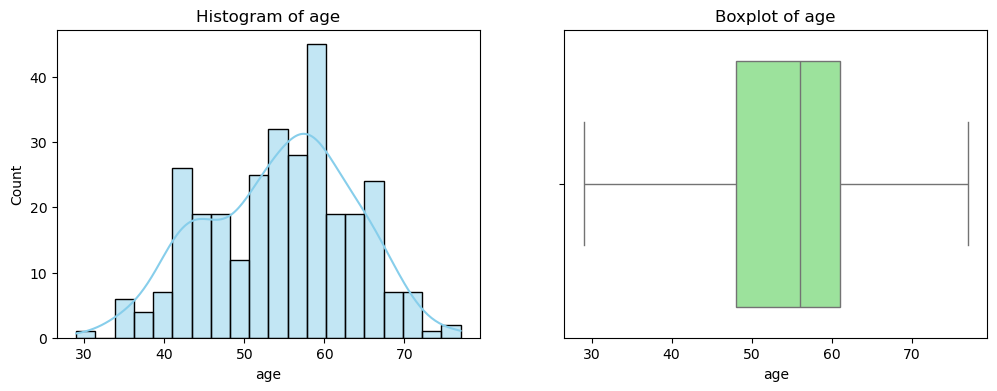

C:\Users\rm241\AppData\Local\Temp\ipykernel_18884\640006686.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col],palette="Set2")


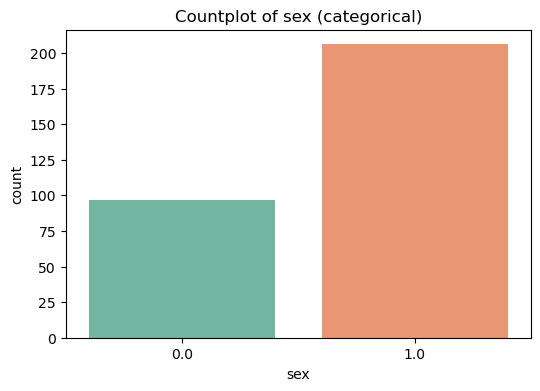

C:\Users\rm241\AppData\Local\Temp\ipykernel_18884\640006686.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col],palette="Set2")


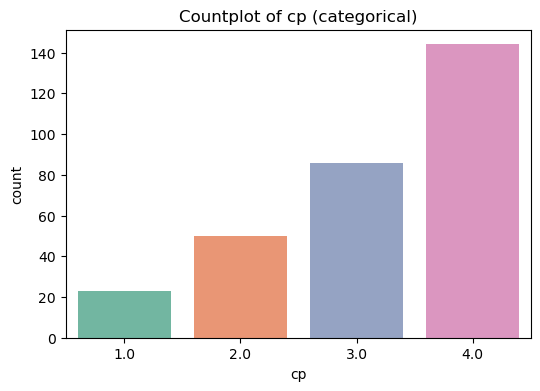

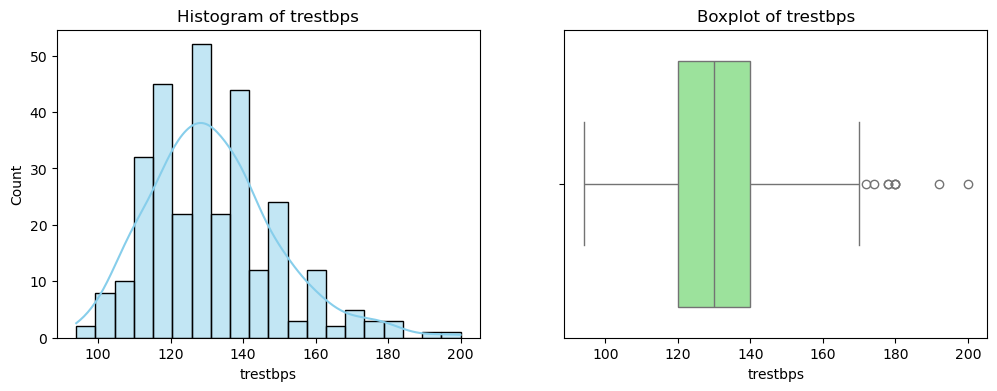

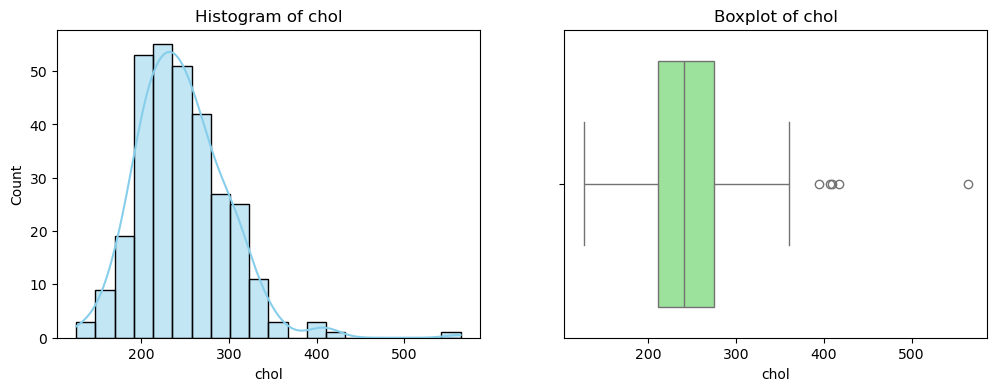

C:\Users\rm241\AppData\Local\Temp\ipykernel_18884\640006686.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col],palette="Set2")


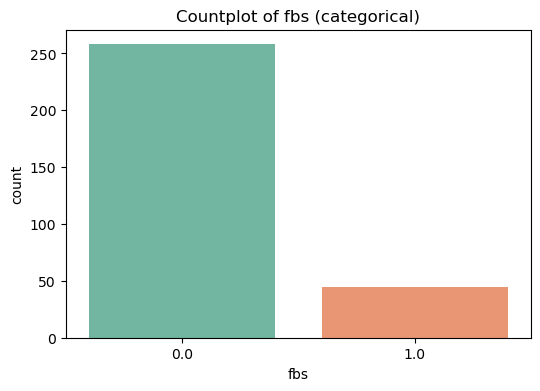

C:\Users\rm241\AppData\Local\Temp\ipykernel_18884\640006686.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col],palette="Set2")


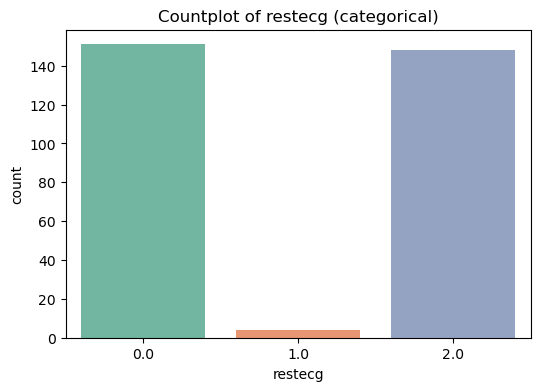

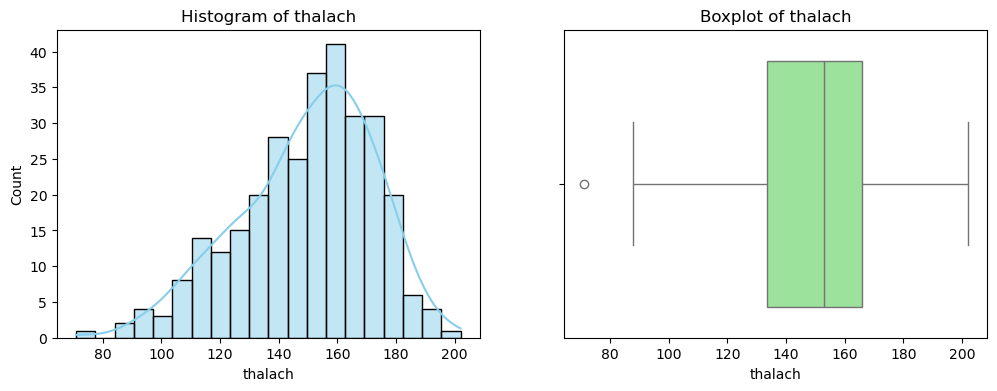

C:\Users\rm241\AppData\Local\Temp\ipykernel_18884\640006686.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col],palette="Set2")


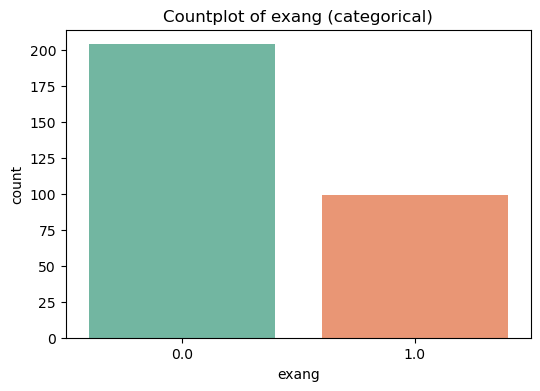

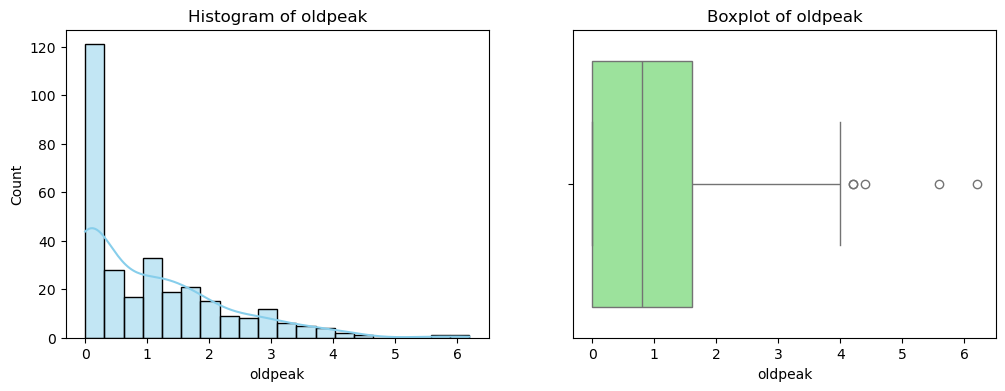

C:\Users\rm241\AppData\Local\Temp\ipykernel_18884\640006686.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col],palette="Set2")


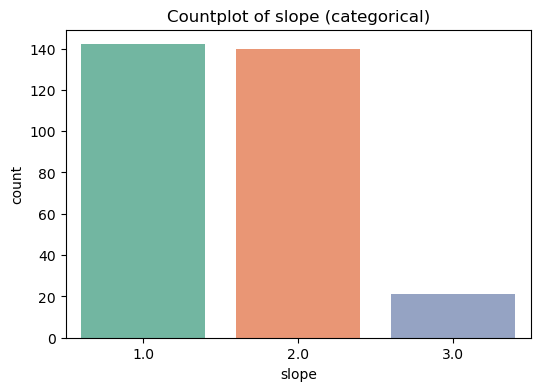

C:\Users\rm241\AppData\Local\Temp\ipykernel_18884\640006686.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col],palette="Set2")


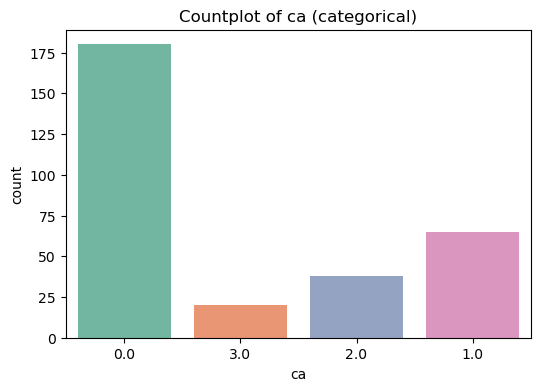

C:\Users\rm241\AppData\Local\Temp\ipykernel_18884\640006686.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col],palette="Set2")


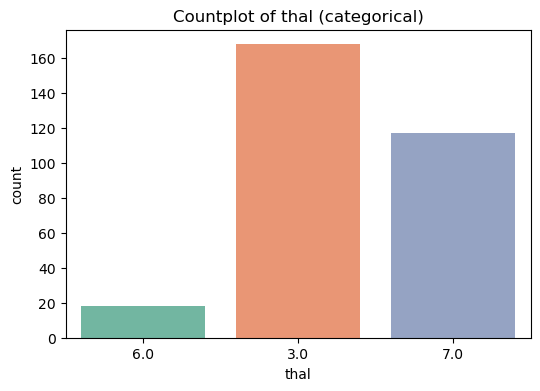

In [36]:
for col in df.columns[:-1]:

    unique_vals = df[col].nunique()

    if unique_vals < 10 :
        plt.figure(figsize=(6,4))
        sns.countplot(x=df[col],palette="Set2")
        plt.title(f'Countplot of {col} (categorical)') 
        plt.show()

    else:
        plt.figure(figsize=(12,4))
        plt.subplot(1,2,1)
        sns.histplot(df[col],kde=True,bins=20,color="skyblue")
        plt.title(f'Histogram of {col}')

        plt.subplot(1,2,2)
        sns.boxplot(x=df[col],color='lightgreen')
        plt.title(f'Boxplot of {col}')
        plt.show()

In [37]:
scaler = StandardScaler()
df[['age','thalach']] = scaler.fit_transform(df[['age','thalach']])

r_scaler = RobustScaler()
df[['oldpeak','chol','trestbps']] = r_scaler.fit_transform(df[['oldpeak','chol','trestbps']])

encoder = OneHotEncoder(sparse_output=False)
thal_encoded = encoder.fit_transform(df[['thal']])
thal_df = pd.DataFrame(thal_encoded, columns=encoder.get_feature_names_out(['thal']))
df = pd.concat([df.drop('thal', axis=1), thal_df], axis=1)

In [38]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,num,thal_3.0,thal_6.0,thal_7.0
0,0.948726,1.0,1.0,0.75,-0.125000,1.0,2.0,0.017197,0.0,0.9375,3.0,0.0,0,0.0,1.0,0.0
1,1.392002,1.0,4.0,1.50,0.703125,0.0,2.0,-1.821905,1.0,0.4375,2.0,3.0,2,1.0,0.0,0.0
2,1.392002,1.0,4.0,-0.50,-0.187500,0.0,2.0,-0.902354,1.0,1.1250,2.0,2.0,1,0.0,0.0,1.0
3,-1.932564,1.0,3.0,0.00,0.140625,0.0,0.0,1.637359,0.0,1.6875,3.0,0.0,0,1.0,0.0,0.0
4,-1.489288,0.0,2.0,0.00,-0.578125,0.0,2.0,0.980537,0.0,0.3750,1.0,0.0,0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,-1.046013,1.0,1.0,-1.00,0.359375,0.0,0.0,-0.770990,0.0,0.2500,2.0,0.0,1,0.0,0.0,1.0
299,1.502821,1.0,4.0,0.70,-0.750000,1.0,0.0,-0.376896,0.0,1.6250,2.0,2.0,2,0.0,0.0,1.0
300,0.283813,1.0,4.0,0.00,-1.718750,0.0,0.0,-1.515388,1.0,0.2500,2.0,1.0,3,0.0,0.0,1.0
301,0.283813,0.0,2.0,0.00,-0.078125,0.0,2.0,1.068113,0.0,-0.5000,2.0,1.0,1,1.0,0.0,0.0


Text(0.5, 1.0, 'Correlation Heatmap')

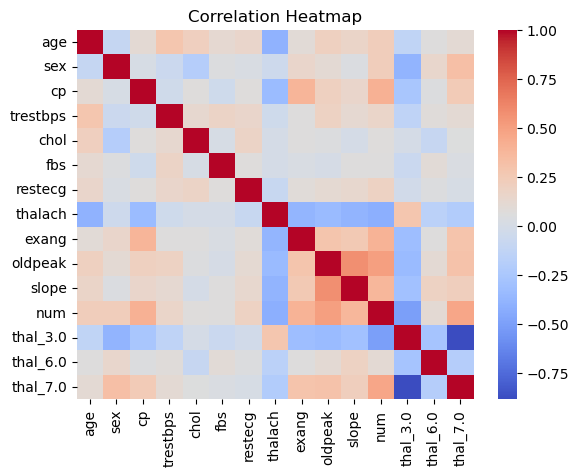

In [39]:
correlation_matrix = df.corr(numeric_only = True)
sns.heatmap(correlation_matrix,cmap="coolwarm")
plt.title("Correlation Heatmap")

In [40]:
#processed_df = df.copy()
